<a href="https://colab.research.google.com/github/simasgg/Edmonds-Karp-Capacity-Scaling/blob/master/EdmondsKarpCapacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[(0, 1, {'weight': 6}), (0, 3, {'weight': 14}), (4, 5, {'weight': 12}), (3, 4, {'weight': 10}), (3, 2, {'weight': 7}), (2, 4, {'weight': 1}), (2, 5, {'weight': 11}), (1, 3, {'weight': 1}), (1, 2, {'weight': 5})]
↑ Mūsų grafas ↑


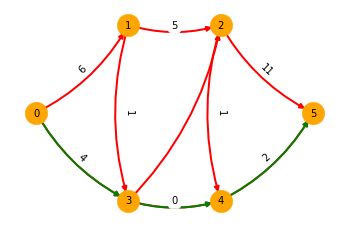

↑ FLOW OF THIS BLOCK ↑ = 10


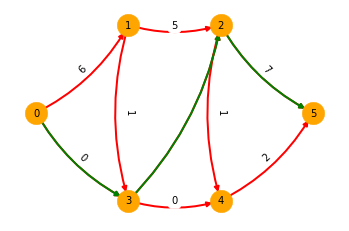

↑ FLOW OF THIS BLOCK ↑ = 4


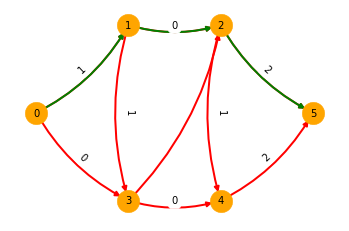

↑ FLOW OF THIS BLOCK ↑ = 5


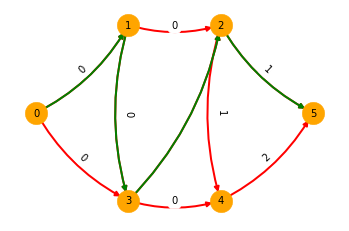

↑ FLOW OF THIS BLOCK ↑ = 1

GALUTINIS ATSAKYMAS (MAX FLOW) = 20


In [ ]:
import networkx as nx
import random
import sys
% matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt # grafikų piešimo įrankiai
plt.style.use('ggplot') # "ggplot" - aukštos kokybės grafika


#Įvairūs pavyzdžiai (vienu metu veikti gali tik vienas pavyzdys!), source ir sink keitimas 119 eilutėje. Parodomasis piešinys veiks tik su šia (14) atkomentuota eilute
def grafas1():
  G = nx.DiGraph() 
  #G.add_weighted_edges_from([(0,1,3),(0,3,3),(1,2,4),(2,0,3),(2,3,1),(2,4,2),(3,5,6),(3,4,2),(4,1,1),(4,6,1),(5,6,9)])   # wiki pavyzdys iliustruojantis back-edge veikimą(be back-edge:4,su:5)(recommended: source:0, sink:6)
  #G.add_weighted_edges_from([(0,1,22),(0,3,4),(1,3,7),(1,2,20),(3,4,18),(4,2,13),(2,5,15),(4,5,20)])                     # (recommended: source:0, sink:5) ats:26
  G.add_weighted_edges_from([(0,1,6),(0,3,14),(1,3,1),(1,2,5),(3,4,10),(2,4,1),(2,5,11),(4,5,12),(3,2,7)])                 # (recommended: source:0, sink:5) ats:20
  #G.add_weighted_edges_from([(0,1,10),(0,2,10),(1,2,2),(1,3,4),(1,4,8),(2,4,9),(3,5,10),(4,3,6),(4,5,10)])               # (recommended: source:0, sink:5) ats:19
  #G.add_weighted_edges_from([(0,1,8),(0,2,4),(1,2,7),(2,3,5),(2,4,6),(3,4,4),(4,5,11)])                                  # (recommended: source:0, sink:5) ats:10
  #G.add_weighted_edges_from([(0,1,100),(0,2,100),(1,2,1),(1,3,100),(2,4,100),(3,4,100),(4,5,200)])                       # (recommended: source:0, sink:5) ats:200
  #G.add_weighted_edges_from([(0,1,100),(0,2,100),(1,2,1),(2,1,0),(1,3,100),(2,3,100)])                                   # (recommended: source:0, sink:3) ats:200
  #G.add_weighted_edges_from([(0,1,1),(1,2,1),(2,4,1),(0,3,1),(3,4,1),(4,7,1),(3,5,1),(5,6,1),(6,7,1)])    #pavyzdys iliustriuojantis back-edge veikimą(be back-edge atsakymas:1, su back-edge:2) (recommended: source:0, sink:7)
  #G.add_weighted_edges_from([(0,3,1),(0,1,1),(3,5,1),(1,2,1),(5,6,1),(2,4,1),(6,7,1),(4,7,1),(3,4,1)])      #pavyzdys iliustriuojantis back-edge veikimą(be back-edge atsakymas:1, su back-edge:2) (recommended: source:0, sink:7)
  return G

#pavyzdys su piesiniu
def grafas2():
  G = nx.DiGraph() 
  G.add_node(0,  pos=(0, 6))
  G.add_node(4,  pos=(4, 3))
  G.add_node(3,  pos=(2, 3))
  G.add_node(2,  pos=(4, 9))
  G.add_node(1,  pos=(2, 9))
  G.add_node(5,  pos=(6, 6))
  G.add_weighted_edges_from([(0,1,6),(0,3,14),(1,3,1),(1,2,5),(3,4,10),(2,4,1),(2,5,11),(4,5,12),(3,2,7)])                 # (recommended: source:0, sink:5) ats:20
  return G

#piešiu grafus
def to_draw_graph(grafas, temp):
  elarge=[(u,v) for (u,v,d) in grafas.edges(data=True) ] # solid edge
  esmall=[(u,v) for (u,v,d) in temp.edges(data=True)] # dashed edge
  pos=nx.get_node_attributes(grafas,'pos',)
  nx.draw_networkx_nodes(grafas, pos, node_size=500, node_color='orange')
  # Draw edges
  nx.draw_networkx_edges(grafas,pos,edgelist=elarge, width=2, edge_color='red', connectionstyle='arc3, rad = 0.15')
  nx.draw_networkx_edges(temp,pos,edgelist=esmall, width=2, edge_color='green', connectionstyle='arc3, rad = 0.15')
  #nx.draw_networkx_edges(grafas,pos,edgelist=esmall, width=3, alpha=0.5,edge_color='black',style='dashed', connectionstyle='arc3, rad = 0.15')
  edge_labels =dict([((u, v), d['weight']) for u, v, d in grafas.edges(data=True) if u<=v ])
  nx.draw_networkx_labels(grafas,pos,font_size=10,font_family='sans-serif') 
  nx.draw_networkx_edge_labels(grafas, pos, edge_labels=edge_labels)
  plt.axis('off')
  plt.savefig("communication_authority_graph.eps", format='eps') # save as eps
  plt.show() # display
  return

#Breadth-first search algoritmas, kuris praeina visas grafo viršūnes, kurių svoris didesnis arba lygus nei delta
def doBFS(grafas, virsunes, source, delta, temp):
  queue = []
  output = []
  output.clear()
  output.append(source)
  current = source
  while True:
    for v in range(len(virsunes)):
      if ((current, virsunes[v]) in grafas.in_edges and virsunes[v] not in output and grafas[current][virsunes[v]]['weight']>=delta):
        output.append(virsunes[v])
        queue.append(virsunes[v])
        temp.add_edge(current, virsunes[v])
        if not grafas.has_edge(virsunes[v], current):
          temp.add_edge(current, virsunes[v])   # susikuriu back-edge (rodančias skirtinga kryptimi)
    #print("current " + str(str(current)))
    #print("output " + str(str(output)))                                # norint pamatyti kaip veikia BFS, atkomentuokite šias tris eilutes
    #print("queue " + str(str(queue)))
    if not queue:
      break
    current = queue[0]
    current = queue.pop(0)
  return output, temp, grafas

def EdmondsKarp(grafas, source, sink):
  temp = nx.DiGraph()
  D = nx.DiGraph() 
  virsunes = list(grafas.nodes)
  suma = 0
  
  #didžiausio svorio briaunos (max) radimas
  maximumas = 0
  for u,v,d in grafas.in_edges(data=True):
    if ((u, v) in grafas.in_edges):
      skaicius = d['weight']
      if skaicius > maximumas:
        maximumas = skaicius
  
  #apskaičiuoju didžiausią galimą 2^x reiksmę(kur x yra kažkoks skaičius), kuri būtų mažesnė arba lygi rastam "maximumas"
  delta=1
  while delta<=maximumas:
      delta *= 2
  delta = delta / 2

  #while kuris skaičiuoja kiekvieną bloką ir to bloko flow (arba tiesiog papildomą taką)
  while True:
    temp.clear()
    #print(grafas.edges(data=True) )                                    #norint pamatyti kaip keičiasi briaunų svoriai su kiekvienu loopu, atkomentuokite šia eilutę

    #Breadth-first search algoritmas
    output, temp, grafas= doBFS(grafas, virsunes, source, delta, temp) 

    #programa nutraukia darbą, kai delta pasiekia vienetą ir sink yra nebepasiekiamas 
    if delta<1 and sink not in output: 
      return suma
    
    #print("edges of temporary graph " + str(str(temp.edges)))                        #norint pamatyti ką apskaičiavo mūsų BFS, atkomentuokite šią eilutę
    D.clear()
    v=sink
    #jeigu nesiekiu sinko, suku while iš naujo su sumažinta delta
    if sink not in output:
      delta=delta/2
      #print("SKIP THIS STEP")  #jei įvyksta "SKIP THIS STEP", tai greičiausiai reiškia, kad neegzistuoja tokia briauna ir jos svoris, kuris būtų mažesnis už deltą IR source siektų sink, todėl sumažinus deltą, sukam while iš naujo
      continue
    
    #sujungiu grafo sink su grafo source briaunomis
    while v is not source:
      for u in range(len(virsunes)):
        if((virsunes[u], v) in temp.in_edges):
          D.add_edge(virsunes[u], v)
          v=virsunes[u]
  
    #randu mūsų rastame take(šį taką sukonstravome bloke tarp 90 ir 95 eilutės) esančių briaunų su mažiausiu svoriu mažiausią reikšmę, kurią vėliau naudosime atimant visų to tako briaunų dydžiams
    minimumas = sys.maxsize
    for u,v,d in grafas.in_edges(data=True):
      if ((u, v) in D.in_edges):
        skaicius = d['weight']
        if skaicius < minimumas:
          minimumas = skaicius
    #atimame "minimumas" reikšmę iš mūsų take esančių briaunų, ir pridedame šią reikšmę prie back-edge briaunų(t.y tų briaunų, kurios rodo į kitą pusę)
    for u,v,d in grafas.in_edges(data=True):
      if ((u, v) in D.in_edges):
        d['weight']-=minimumas 
      if ((v, u) in D.in_edges):
        d['weight']+=minimumas 
    
    #piesiu grafa
    to_draw_graph(grafas, D)

    print("↑ FLOW OF THIS BLOCK ↑ = "+ str(minimumas))

    #sudedame visų blokų "minimumas" reikšmes ir gauname sumą, kuri ir yra mus dominantis MAX FLOW
    suma+=minimumas

G = grafas2()
print(G.edges(data=True) ) 
print("↑ Mūsų grafas ↑")
out = EdmondsKarp(G, 0, 5)
print("\nGALUTINIS ATSAKYMAS (MAX FLOW) = " + str(str(out)))
